In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celebal-ana-verse-n/train.parquet
/kaggle/input/celebal-ana-verse-n/sample_submission.parquet
/kaggle/input/celebal-ana-verse-n/test.parquet
/kaggle/input/combining-test-and-submission-datasets-in-python/sample-submission.csv
/kaggle/input/combining-test-and-submission-datasets-in-python/netflix_titles.xlsx
/kaggle/input/combining-test-and-submission-datasets-in-python/test.csv
/kaggle/input/combining-test-and-submission-datasets-in-python/celebal-ana-verse-n/train.parquet
/kaggle/input/combining-test-and-submission-datasets-in-python/celebal-ana-verse-n/sample_submission.parquet
/kaggle/input/combining-test-and-submission-datasets-in-python/celebal-ana-verse-n/test.parquet


ID        0
target    0
dtype: int64
Index(['ID', 'target'], dtype='object')
sensor_1 and sensor_2 columns are not found. Please check the data.


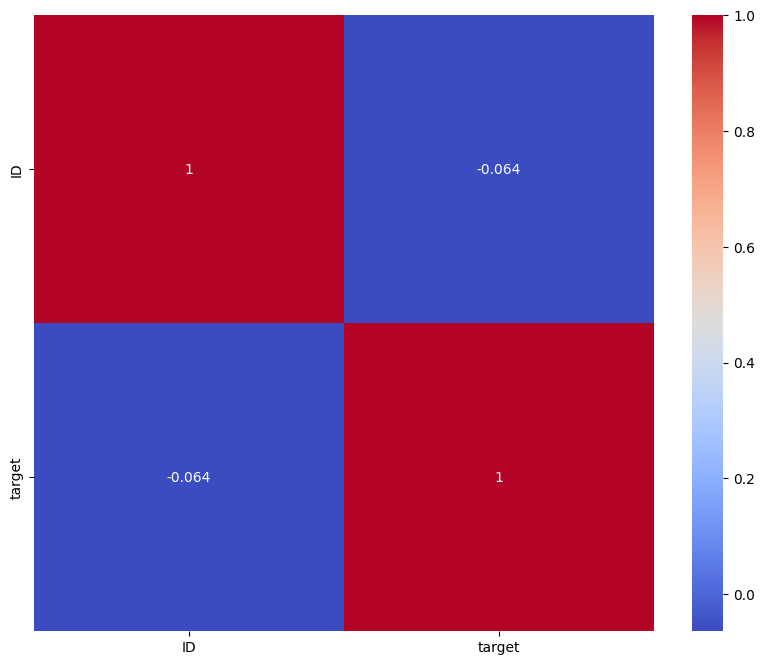

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the dataset (adjust the path to your dataset accordingly)
df = pd.read_parquet('/kaggle/input/combining-test-and-submission-datasets-in-python/celebal-ana-verse-n/sample_submission.parquet')

# Check for missing values
print(df.isnull().sum())

# Handle missing values by using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' based on data
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check column names to adjust sensor columns and target column names
print(df_imputed.columns)

# Outlier Detection (Z-score method) only for numeric columns
numeric_columns = df_imputed.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df_imputed[numeric_columns]))
outliers = (z_scores > 3).all(axis=1)  # You can adjust the threshold as needed

# Removing outliers
df_cleaned = df_imputed[~outliers]

# Feature Engineering: Example creating a new feature based on existing ones
# Make sure to replace 'sensor_1' and 'sensor_2' with actual column names from your data
# Check the columns and adjust accordingly
if 'sensor_1' in df_cleaned.columns and 'sensor_2' in df_cleaned.columns:
    df_cleaned['new_feature'] = df_cleaned['sensor_1'] * df_cleaned['sensor_2']
else:
    print("sensor_1 and sensor_2 columns are not found. Please check the data.")

# Correlation Analysis: Visualizing the correlation between features
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature Scaling
# Assuming 'target' is the anomaly column, update if the actual column name differs
if 'target' in df_cleaned.columns:
    X_scaled = StandardScaler().fit_transform(df_cleaned.drop('target', axis=1))  # Exclude the target column for scaling
else:
    print("Target column is not found. Please check the data.")


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_cleaned['target'], test_size=0.2, random_state=42)

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Model 3: XGBoost
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

# Model 4: SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Model Evaluation: Print performance metrics for each model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("XGBoost Classification Report:")
print(classification_report(y_test, xg_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

SVM Classificati

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy, Precision, Recall, F1 Score for each model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1

# Evaluating Logistic Regression
lr_metrics = evaluate_model(y_test, lr_pred)
print(f"Logistic Regression - Accuracy: {lr_metrics[0]}, Precision: {lr_metrics[1]}, Recall: {lr_metrics[2]}, F1: {lr_metrics[3]}")

# Evaluating Random Forest
rf_metrics = evaluate_model(y_test, rf_pred)
print(f"Random Forest - Accuracy: {rf_metrics[0]}, Precision: {rf_metrics[1]}, Recall: {rf_metrics[2]}, F1: {rf_metrics[3]}")

# Evaluating XGBoost
xg_metrics = evaluate_model(y_test, xg_pred)
print(f"XGBoost - Accuracy: {xg_metrics[0]}, Precision: {xg_metrics[1]}, Recall: {xg_metrics[2]}, F1: {xg_metrics[3]}")

# Evaluating SVM
svm_metrics = evaluate_model(y_test, svm_pred)
print(f"SVM - Accuracy: {svm_metrics[0]}, Precision: {svm_metrics[1]}, Recall: {svm_metrics[2]}, F1: {svm_metrics[3]}")


Logistic Regression - Accuracy: 1.0, Precision: 0.0, Recall: 0.0, F1: 0.0
Random Forest - Accuracy: 0.9, Precision: 0.0, Recall: 0.0, F1: 0.0
XGBoost - Accuracy: 1.0, Precision: 0.0, Recall: 0.0, F1: 0.0
SVM - Accuracy: 1.0, Precision: 0.0, Recall: 0.0, F1: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall